In [1]:
from fastai.vision.all import *
from Axial_Model import resnet50

In [2]:
CLASSES = 10

def prepare_data(img_size, batch_size):
    path = untar_data(URLs.IMAGENETTE_320)
    item_tfms=RandomResizedCrop(size=img_size, min_scale=0.8)
    batch_tfms=[*aug_transforms(flip_vert=False, max_lighting=0.2, max_rotate=15., max_zoom=1.1, max_warp=0.2, p_affine=0.75, p_lighting=0.75), 
                Normalize.from_stats(*imagenet_stats)]
    dls = ImageDataLoaders.from_folder(path, valid='val', item_tfms=item_tfms, batch_tfms=batch_tfms, bs=batch_size)  
    return dls

ds = prepare_data(224, 20)

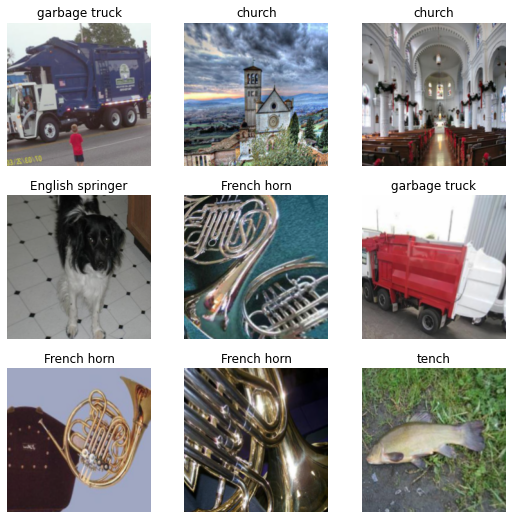

In [3]:
ds.show_batch()

In [4]:
num_heads = 8
model = resnet50(num_classes=CLASSES, attention=[True,True,True,True], num_heads=num_heads)
learn = Learner(ds, model, opt_func=Adam, metrics=accuracy)

In [5]:
epochs = 1
lr = 1e-4
learn.fit(n_epoch=epochs, lr=lr, cbs=ReduceLROnPlateau(monitor='accuracy', min_delta=0.001, patience=10, factor=3, min_lr=1e-8)) 

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 